Epoch [1000/10000], Loss: 1.1375
Epoch [2000/10000], Loss: 0.2862
Epoch [3000/10000], Loss: 0.1247
Epoch [4000/10000], Loss: 0.0726
Epoch [5000/10000], Loss: 8.4242
Epoch [6000/10000], Loss: 0.0368
Epoch [7000/10000], Loss: 0.0293
Epoch [8000/10000], Loss: 0.2410
Epoch [9000/10000], Loss: 0.4353
Epoch [10000/10000], Loss: 0.7794
Test Loss: 2.8439


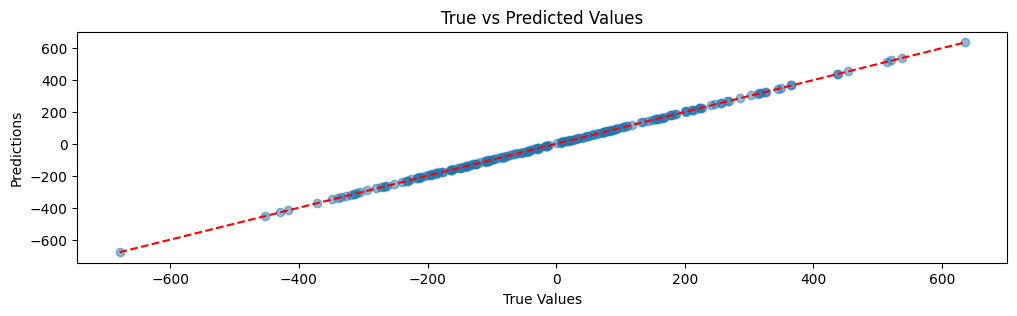

In [28]:
import torch
from sklearn.datasets import make_regression
import torch.nn as nn
import matplotlib.pyplot as plt

class SimpleRegressionNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRegressionNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        return self.model(x)

def load_data():
    X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.float32)
    return X, y.reshape(-1, 1)

X, y = load_data()

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

# train the model
model = SimpleRegressionNN(input_size=10, hidden_size=64, output_size=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
num_epochs = 10000

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        
# evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')
    
# Plot the results
plt.figure(figsize=(12, 3))
plt.scatter(y_test.numpy(), test_outputs.numpy(), alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

Epoch [500/3000], Loss: 3.0267
Epoch [1000/3000], Loss: 1.0265
Epoch [1500/3000], Loss: 1.1621
Epoch [2000/3000], Loss: 5.1731
Epoch [2500/3000], Loss: 2.7744
Epoch [3000/3000], Loss: 0.4107
Test Loss: 6.6240


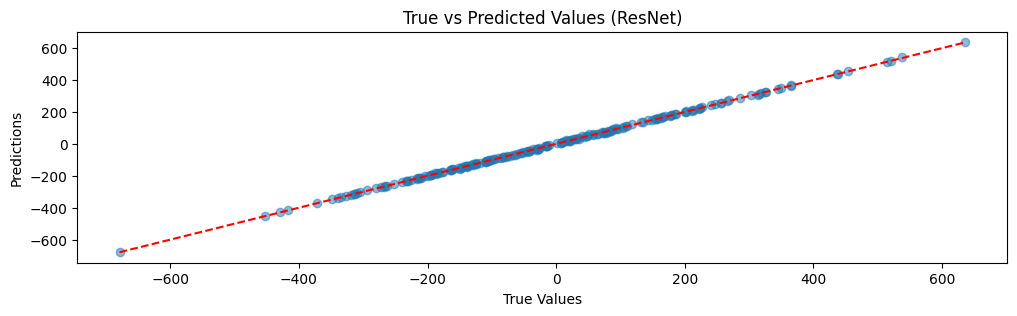

In [29]:
# Define a basic residual block
class ResidualBlock(nn.Module):
    def __init__(self, hidden_size):
        super(ResidualBlock, self).__init__()
        self.fc1 = nn.Linear(hidden_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)

    def forward(self, x):
        identity = x
        out = F.relu(self.fc1(x))
        out = self.fc2(out)
        out += identity  # skip connection
        out = F.relu(out)
        return out

# Define the full ResNet model
class ResNetRegression(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_blocks=3):
        super(ResNetRegression, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_size)
        self.res_blocks = nn.Sequential(*[ResidualBlock(hidden_size) for _ in range(num_blocks)])
        self.output_layer = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.input_layer(x))
        x = self.res_blocks(x)
        x = self.output_layer(x)
        return x

# Train the model
model = ResNetRegression(input_size=10, hidden_size=64, output_size=1, num_blocks=5)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
num_epochs = 3000

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

# Plot the results
plt.figure(figsize=(12, 3))
plt.scatter(y_test.numpy(), test_outputs.numpy(), alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values (ResNet)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

NTK


/home/kostasme/.kostas/lib/python3.11/site-packages/torch/autograd/graph.py:769: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 0, Loss: 0.060269, NTK cond#: -7.24e+07
Epoch 100, Loss: 0.000072, NTK cond#: -7.09e+07
Epoch 200, Loss: 0.000016, NTK cond#: -7.66e+07
Epoch 300, Loss: 0.000004, NTK cond#: -7.15e+07
Epoch 400, Loss: 0.000002, NTK cond#: -7.71e+07
Epoch 500, Loss: 0.000002, NTK cond#: -6.94e+07
Epoch 600, Loss: 0.000002, NTK cond#: -7.63e+07
Epoch 700, Loss: 0.000001, NTK cond#: -7.17e+07
Epoch 800, Loss: 0.000001, NTK cond#: -8.10e+07
Epoch 900, Loss: 0.000001, NTK cond#: -6.92e+07
Epoch 1000, Loss: 0.000001, NTK cond#: -7.63e+07
Epoch 1100, Loss: 0.000001, NTK cond#: -7.80e+07
Epoch 1200, Loss: 0.000000, NTK cond#: -7.12e+07
Epoch 1300, Loss: 0.000000, NTK cond#: -6.24e+07
Epoch 1400, Loss: 0.000000, NTK cond#: -7.52e+07
Epoch 1500, Loss: 0.000000, NTK cond#: -7.60e+07
Epoch 1600, Loss: 0.000000, NTK cond#: -7.49e+07
Epoch 1700, Loss: 0.000000, NTK cond#: -7.69e+07
Epoch 1800, Loss: 0.000000, NTK cond#: -7.50e+07
Epoch 1900, Loss: 0.000000, NTK cond#: -7.51e+07
Epoch 2000, Loss: 0.000000, NTK 

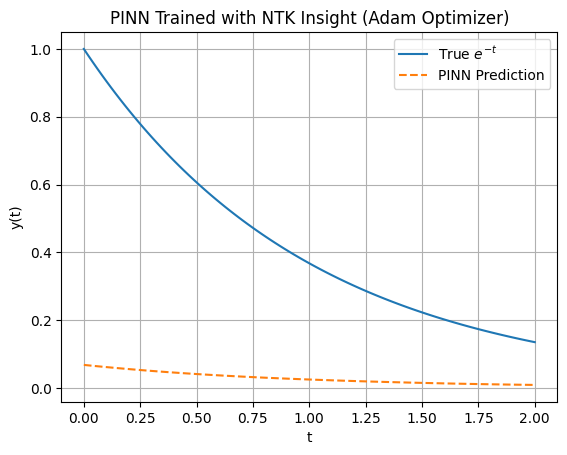

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Define the PINN
class PINN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 32),
            nn.Tanh(),
            nn.Linear(32, 32),
            nn.Tanh(),
            nn.Linear(32, 1)
        )

    def forward(self, t):
        return self.net(t)

# True solution
def true_solution(t):
    return torch.exp(-t)

# Physics-based residual: dy/dt + y = 0
def pinn_residual(model, t):
    t.requires_grad_(True)
    y = model(t)
    dy_dt = torch.autograd.grad(y, t, torch.ones_like(y), create_graph=True)[0]
    residual = dy_dt + y
    return residual

# Compute NTK matrix
def compute_ntk(model, t):
    model.zero_grad()
    outputs = model(t)
    ntk = []

    for i in range(len(t)):
        grad_i = torch.autograd.grad(outputs[i], model.parameters(), retain_graph=True, create_graph=True)
        grad_i = torch.cat([g.flatten() for g in grad_i])
        row = []
        for j in range(len(t)):
            grad_j = torch.autograd.grad(outputs[j], model.parameters(), retain_graph=True, create_graph=True)
            grad_j = torch.cat([g.flatten() for g in grad_j])
            row.append(torch.dot(grad_i, grad_j).unsqueeze(0))
        ntk.append(torch.cat(row))

    return torch.stack(ntk)

# Training settings
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PINN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 3000
t_train = torch.linspace(0, 2, 50).view(-1, 1).to(device)

loss_log = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    
    # Compute residual
    residual = pinn_residual(model, t_train)
    loss = torch.mean(residual**2)

    # NTK guidance
    if epoch % 100 == 0:
        ntk = compute_ntk(model, t_train).detach().cpu().numpy()
        eigvals = np.linalg.eigvalsh(ntk)
        cond_number = np.max(eigvals) / np.min(eigvals[np.nonzero(eigvals)])
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}, NTK cond#: {cond_number:.2e}")

    loss.backward()
    optimizer.step()
    loss_log.append(loss.item())

# Plot learned vs true
model.eval()
t_test = torch.linspace(0, 2, 100).view(-1, 1).to(device)
with torch.no_grad():
    y_pred = model(t_test).cpu()
y_true = true_solution(t_test).cpu()

plt.plot(t_test.cpu(), y_true, label="True $e^{-t}$")
plt.plot(t_test.cpu(), y_pred, '--', label="PINN Prediction")
plt.legend()
plt.title("PINN Trained with NTK Insight (Adam Optimizer)")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid()
plt.show()
